<br></br>

<div class="row" width="50%" align="center">
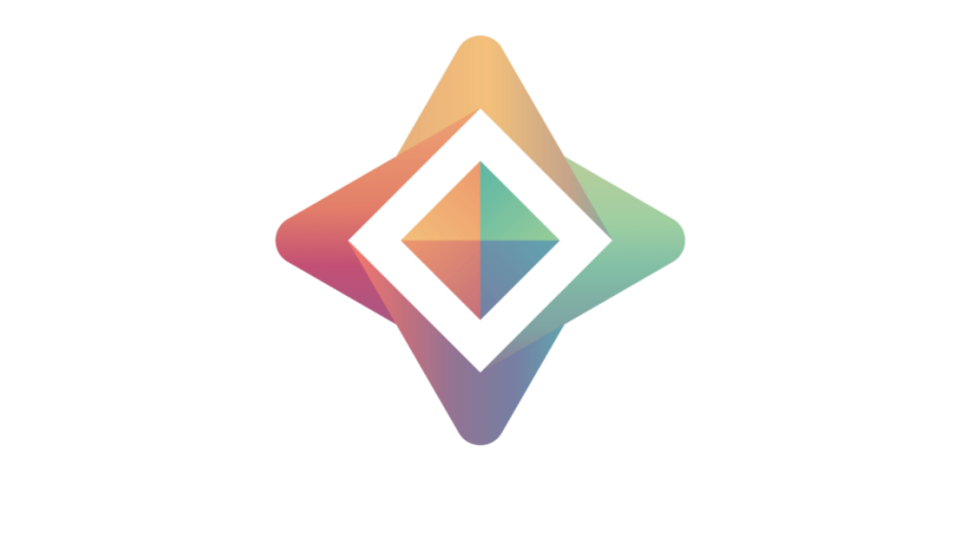
<img src="../CCAIO workshop imgs/steps/-2.svg" style="width: 25%" align="center"/>
</div>
<br>

<div align="center">
<h1>How to audit an algorithm of a company you don't have access to?
</h1>
<h2>Case Study: DailyMotion</h2>
</div>


 <br><br>
 <div align="center">
    <div style="background: #f9f9f9 none repeat scroll 0 0;
    border: 1px solid #aaa;
    display: table;
    font-size: 100%;
    margin-bottom: 1em;
    padding: 20px;
    width: auto;">
        <div align="left">
<p style="font-weight: 700;
    font-size: 30px;
    text-align: center;">Contents</p>
<ul style="list-style: outside none none !important;">
  <li><a href="#First_Point_Header">DailyMotion's auditing process</a></li>
  <li><a href="#Second_Point_Header">1. Data Collection</a></li>
  <li><a href="#Third_Point_Header">2. Enabling external access </a></li>
  <ul>
    <li><a href="#First_Sub_Point_2">Launching domain server</a></li>
    <li><a href="#Second_Sub_Point_2">How to research data you cannot see</a></li>
  </ul>
<li><a href="#Fifth_Point_Header">3. Answering research questions via PySyft</a></li>
            </ul></div>
</div></div>


</br>
</br>

<h1 align="center">DailyMotion’s process to algorithmic auditing</h1>


<center><img src="../CCAIO workshop imgs/steps/-1.svg" align="center" style="width:75%; align:center"/></center>



</br>

<h1 align="center">Data Collection</h1>

### What questions should be answered by researchers?

</br>

- DailyMotion is a video streaming company that relies on AI recommender systems
- The system for serving videos follows a waterfall fallback rule to decide which algorithm is used


### AI Algorithms at DailyMotion
The algorithms recommend next videos based on:

- **Algorithm A**: collaborative data (users' interactions and videos' metadata)
- **Algorithm B**, **Algorithm C**: only the metadata of the initial video  and the candidate videos

Additionally, proprietary AI algorithms and human-labelling are used to score individual videos - *in particular for detecting suggestiveness (harmful content)*. 

</br>

<div  class="admonition alert alert-warning" style="font-size:120%">
    <p class="admonition-title" style="font-weight:bold">Question</p>
    What type of data could enable external researchers to study meaningful algorithmic outcomes?</div>
    
</br>
</br></br>


<h1 align="center"> Studying algorithms: Impression data</h1>

**Impressions** = how many times a content unit (e.g. posts, tweets, videos) was recommended by an algorithm and viewed by users. 

### Why are impressions important?
It help researchers understand whether:
- the algorithm amplifies a specific type of content or not 
- the amplification happens due to specific attributes, such as *topic, length, political party, gender representation*, etc.

### DailyMotion's proposed dataset schema - impression data:
- **Video Metadata**: title, description, tags
- **Recommendations**: how many times it was recommended by a specific algorithm
- **Algorithm**: which algorithm recommended it
- **Suggestiveness**: AI-based score of how harmful (e.g. violent or sexual) the content of the video is

<table style="font-size:27px"><tr><th >Video ID <th><th> Title <th><th> Description <th><th> Tags<th><th> Recommendations <th><th> Algorithm <th><th> Suggestiveness<tr><tr>
<tr><td> id1 <td><td> Official contra <td><td> Found 1x05 .. <td><td>series, ..<td><td>10000<td><td>C<td><td>0.2<tr>
<tr><td> id2 <td><td> How to Make   <td><td> In this video.. <td><td>food, rec..<td><td>250000<td><td>A<td><td>0.05<tr>
<tr><td> id3 <td><td> Architect Breaks <td><td> Today AD is .. <td><td>records, ..<td><td>1300<td><td>B<td><td>0.11<tr>
<tr><td> ... <td><td> ...<td><td> ... <td><td> .. <td><td> .. <td><td> .. <td><td><tr>

    
<table>
    
**randomly generated features in the table above*

<br>
<br>

<h1 align="center">Enabling external access</h1>
<center><img src="CCAIO workshop imgs/steps/00.svg" style="width:70%; align:center"/></center>

# 1.1 Launching a Domain Server

<img src="CCAIO workshop imgs/steps/11.svg" style="width:90%; align:center"/>

**Admin** = DailyMotion's employee responsible for managing the server and supporting the researcher in their study. 

**Domain Server** = holds the organisation's datasets and allows an external auditor to remotely query it.

In [14]:
%%capture
import syft as sy # importing PySyft

# Launch an example node
domain_server = sy.orchestra.launch(name="dailymotion_node", port=8087, dev_mode=False, reset=True) 

Logged into <dailymotion_node: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

<DomainClient: dailymotion_node>
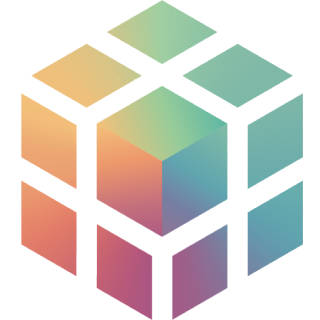

In [4]:
# Access the node
admin_client = sy.login(port=8087, email="info@openmined.org", password="changethis")
admin_client

<br>
<br>

# 1.2 Making data available on the server
<img src="CCAIO workshop imgs/steps/12.svg" style="width:90%; align:center"/>

The researcher never works directly with the private data, but *a fake version of it that looks like it*.


### Why *fake* or *mock* data?
- can be distributed to and **accesible by anyone**
- foundation to propose research questions and research code
- testing environment for the researcher's analysis

<img src="CCAIO workshop imgs/steps/01.svg" style="width:90%; align:center"/>


### Uploading mock and private data to Domain

In [13]:
import pandas as pd 

# Load private and mock datasets
private_df, mock_df = pd.read_csv("private_data.csv"), pd.read_csv("mock_data.csv")
mock_df.head()

,suggestive,algo,recommendations,title,desc,tags
0,0.11,C,61991.0,Official contra Judy Guide Abraham Team,upcoming survive The eyes the había que 112 Pr...,Etats-Unis turca
1,0.20,B,120354.0,Thousand Audrey But,las /><br قلب araya Level hakkında <br <br qui...,NaN
2,0.06,C,15490.0,Titre Bersama dengan But amoureux,대표의 osman che Eric Secure boleh https://rb.gy/...,NaN
3,0.31,B,158348.0,los Benefits Stories,kini </a> technique Teenmaar bukan experience ...,NaN
4,0.10,A,232281.0,Untitled Parte été,masih aldı. manos Ozan người turning the 입장을 t...,movie


In [4]:
# Describe the dataset made available
dataset = sy.Dataset(
    name="DailyMotion Video Recommendations Data",
    description="DailyMotion Video recommendations made by threee different algorithms, capturing 1% of DailyMotion's videos",
    asset_list=[sy.Asset(name="Recommendation Data", data=private_df, mock=mock_df)]
)

In [5]:
# Upload the dataset
admin_client.upload_dataset(dataset)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

Uploading: Recommendation Data


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.16s/it]


SyftSuccess: Dataset uploaded to 'dailymotion_node'. To see the datasets uploaded by a client on this node, use command `[your_client].datasets`

In [6]:
# Check datasets 
admin_client.datasets

<br>
<br>

# 1.3 Giving access to the external researchers

<img src="CCAIO workshop imgs/steps/13.svg" style="width:90%; align:center"/>
 
<br>
<br>

### Who should be allowed access?
<div class="row">
<img src="CCAIO workshop imgs/steps/02.svg" style="width:15%" align="right">
 <p>DailyMotion conducts a background check of possible candidates to understand the incentives of the auditee:
    </p>
<ul align="left">
<li>affiliation</li>
<li>motivation for conducting this project</li>
<li>type of questions intended to answer</li>
<li>intended use of the results</li>
</ul>
</div>
Once the researcher is approved, offering access is just creating a set of credentials:

In [7]:
admin_client.register(
    name='oscarwilde', 
    email='oscarwilde@skywalker.net', 
    password='oscars_house')

Confirm Password:  ············


SyftSuccess: User 'oscarwilde' successfully registered! To see users, run `[your_client].users`

In [8]:
admin_client.users